In [1]:
# Install required packages
!pip install kagglehub torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import kagglehub
import matplotlib.pyplot as plt

In [16]:
# 🚀 Download the Anime Face Dataset
path = kagglehub.dataset_download("splcher/animefacedataset")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/animefacedataset


In [17]:
# Set Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [26]:
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # ✅ Force consistent 64x64 size
    transforms.CenterCrop(64),  # ✅ Ensures all images have uniform size
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])


In [27]:
# Load Dataset
dataset = torchvision.datasets.ImageFolder(root=path, transform=transform)
train_loader = DataLoader(dataset, batch_size=128, shuffle=True)

In [28]:
# 🔥 Generator Network
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256 * 8 * 8),
            nn.ReLU(),
            nn.Unflatten(1, (256, 8, 8)),
            nn.ConvTranspose2d(256, 128, 4, 2, 1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, 4, 2, 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 3, 4, 2, 1),
            nn.Tanh()
        )

    def forward(self, z):
        return self.model(z)

In [29]:
# 🔥 Discriminator Network
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 64, 4, 2, 1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(64, 128, 4, 2, 1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2),
            nn.Conv2d(128, 256, 4, 2, 1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2),
            nn.Flatten(),
            nn.Linear(256 * 8 * 8, 1)  # ❌ No Sigmoid
        )

    def forward(self, img):
        return self.model(img)

In [30]:
# Initialize Networks
G = Generator().to(device)
D = Discriminator().to(device)

In [31]:
# Loss and Optimizers
criterion = nn.BCEWithLogitsLoss()
g_optimizer = optim.Adam(G.parameters(), lr=0.0001, betas=(0.5, 0.999))
d_optimizer = optim.Adam(D.parameters(), lr=0.0002, betas=(0.5, 0.999))

In [32]:
# Training Setup
epochs = 10
fixed_noise = torch.randn(16, 100, device=device)  # Fixed noise for checking progress
d_losses, g_losses = [], []

Epoch [1/10], Step [0/497], D Loss: 1.4561, G Loss: 0.9411
Epoch [1/10], Step [50/497], D Loss: 0.6925, G Loss: 2.3442
Epoch [1/10], Step [100/497], D Loss: 0.7031, G Loss: 2.0955
Epoch [1/10], Step [150/497], D Loss: 0.8408, G Loss: 1.8549
Epoch [1/10], Step [200/497], D Loss: 0.6856, G Loss: 2.4652
Epoch [1/10], Step [250/497], D Loss: 0.6908, G Loss: 2.7433
Epoch [1/10], Step [300/497], D Loss: 0.7617, G Loss: 2.4323
Epoch [1/10], Step [350/497], D Loss: 0.7002, G Loss: 2.2080
Epoch [1/10], Step [400/497], D Loss: 0.6930, G Loss: 2.4123
Epoch [1/10], Step [450/497], D Loss: 0.7746, G Loss: 3.6856


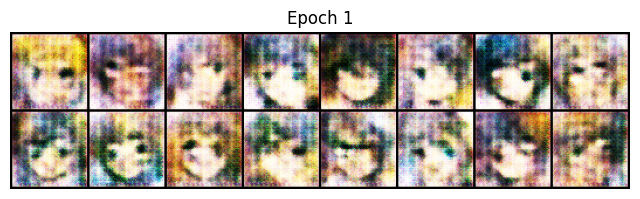

Epoch [2/10], Step [0/497], D Loss: 0.7039, G Loss: 2.2793
Epoch [2/10], Step [50/497], D Loss: 0.9968, G Loss: 2.2933
Epoch [2/10], Step [100/497], D Loss: 0.6932, G Loss: 2.3855
Epoch [2/10], Step [150/497], D Loss: 0.6860, G Loss: 2.3158
Epoch [2/10], Step [200/497], D Loss: 0.6922, G Loss: 2.9076
Epoch [2/10], Step [250/497], D Loss: 0.6841, G Loss: 2.4816
Epoch [2/10], Step [300/497], D Loss: 0.6978, G Loss: 2.8096
Epoch [2/10], Step [350/497], D Loss: 0.7205, G Loss: 2.4463
Epoch [2/10], Step [400/497], D Loss: 0.9157, G Loss: 5.0650
Epoch [2/10], Step [450/497], D Loss: 0.7454, G Loss: 1.8419


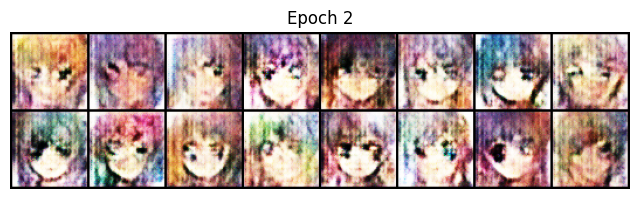

Epoch [3/10], Step [0/497], D Loss: 0.7254, G Loss: 2.0316
Epoch [3/10], Step [50/497], D Loss: 0.7033, G Loss: 2.3425
Epoch [3/10], Step [100/497], D Loss: 0.7073, G Loss: 2.2592
Epoch [3/10], Step [150/497], D Loss: 1.1669, G Loss: 1.2583
Epoch [3/10], Step [200/497], D Loss: 0.7679, G Loss: 1.6277
Epoch [3/10], Step [250/497], D Loss: 0.6894, G Loss: 2.7535
Epoch [3/10], Step [300/497], D Loss: 0.6836, G Loss: 2.6812
Epoch [3/10], Step [350/497], D Loss: 0.6988, G Loss: 2.9343
Epoch [3/10], Step [400/497], D Loss: 0.6728, G Loss: 2.2797
Epoch [3/10], Step [450/497], D Loss: 0.6949, G Loss: 1.9540


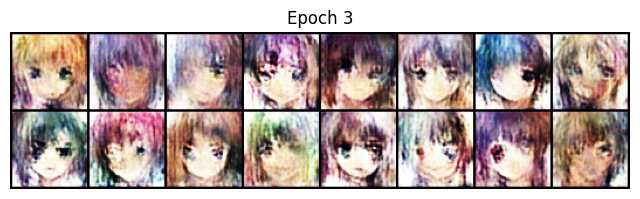

Epoch [4/10], Step [0/497], D Loss: 0.7164, G Loss: 2.6958
Epoch [4/10], Step [50/497], D Loss: 0.7321, G Loss: 2.4592
Epoch [4/10], Step [100/497], D Loss: 0.6793, G Loss: 2.7791
Epoch [4/10], Step [150/497], D Loss: 0.7052, G Loss: 2.2289
Epoch [4/10], Step [200/497], D Loss: 0.7098, G Loss: 1.9861
Epoch [4/10], Step [250/497], D Loss: 0.7527, G Loss: 2.5476
Epoch [4/10], Step [300/497], D Loss: 0.7226, G Loss: 1.8609
Epoch [4/10], Step [350/497], D Loss: 0.6831, G Loss: 2.2750
Epoch [4/10], Step [400/497], D Loss: 0.6864, G Loss: 2.6252
Epoch [4/10], Step [450/497], D Loss: 0.6840, G Loss: 2.4431


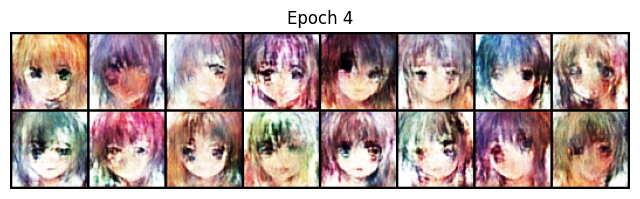

Epoch [5/10], Step [0/497], D Loss: 0.6850, G Loss: 2.2354
Epoch [5/10], Step [50/497], D Loss: 0.6789, G Loss: 2.3164
Epoch [5/10], Step [100/497], D Loss: 0.6817, G Loss: 2.3479
Epoch [5/10], Step [150/497], D Loss: 0.7183, G Loss: 1.9475
Epoch [5/10], Step [200/497], D Loss: 1.9202, G Loss: 2.4688
Epoch [5/10], Step [250/497], D Loss: 0.6976, G Loss: 2.1880
Epoch [5/10], Step [300/497], D Loss: 0.6905, G Loss: 2.0998
Epoch [5/10], Step [350/497], D Loss: 0.6861, G Loss: 1.7526
Epoch [5/10], Step [400/497], D Loss: 0.6873, G Loss: 1.9761
Epoch [5/10], Step [450/497], D Loss: 0.6809, G Loss: 2.4679


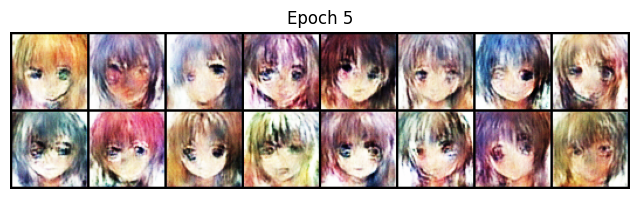

Epoch [6/10], Step [0/497], D Loss: 0.7090, G Loss: 2.8566
Epoch [6/10], Step [50/497], D Loss: 0.7639, G Loss: 2.8395
Epoch [6/10], Step [100/497], D Loss: 0.6766, G Loss: 1.9995
Epoch [6/10], Step [150/497], D Loss: 0.6897, G Loss: 2.3469
Epoch [6/10], Step [200/497], D Loss: 0.6784, G Loss: 2.4310
Epoch [6/10], Step [250/497], D Loss: 1.2236, G Loss: 3.6583
Epoch [6/10], Step [300/497], D Loss: 0.6945, G Loss: 2.5442
Epoch [6/10], Step [350/497], D Loss: 0.6806, G Loss: 2.4150
Epoch [6/10], Step [400/497], D Loss: 0.6790, G Loss: 2.0337
Epoch [6/10], Step [450/497], D Loss: 0.6783, G Loss: 2.7414


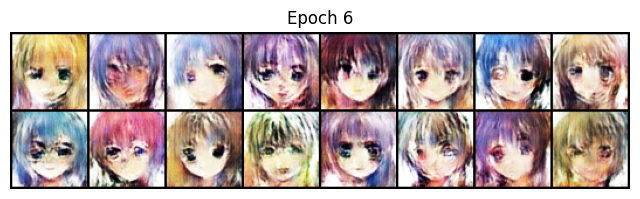

Epoch [7/10], Step [0/497], D Loss: 0.6776, G Loss: 2.3368
Epoch [7/10], Step [50/497], D Loss: 0.6710, G Loss: 2.2069
Epoch [7/10], Step [100/497], D Loss: 0.6763, G Loss: 2.0927
Epoch [7/10], Step [150/497], D Loss: 0.7003, G Loss: 1.9617
Epoch [7/10], Step [200/497], D Loss: 0.6782, G Loss: 1.9632
Epoch [7/10], Step [250/497], D Loss: 0.7479, G Loss: 1.9897
Epoch [7/10], Step [300/497], D Loss: 0.6800, G Loss: 2.4123
Epoch [7/10], Step [350/497], D Loss: 0.6938, G Loss: 1.6220
Epoch [7/10], Step [400/497], D Loss: 0.6775, G Loss: 2.4811
Epoch [7/10], Step [450/497], D Loss: 0.6997, G Loss: 2.2596


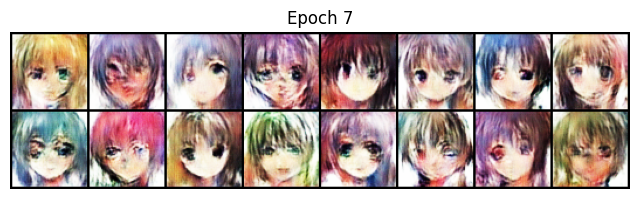

Epoch [8/10], Step [0/497], D Loss: 0.6774, G Loss: 2.4753
Epoch [8/10], Step [50/497], D Loss: 0.7191, G Loss: 3.1001
Epoch [8/10], Step [100/497], D Loss: 0.7195, G Loss: 2.4274
Epoch [8/10], Step [150/497], D Loss: 0.6868, G Loss: 2.2046
Epoch [8/10], Step [200/497], D Loss: 0.6771, G Loss: 2.2607
Epoch [8/10], Step [250/497], D Loss: 0.6797, G Loss: 2.4072
Epoch [8/10], Step [300/497], D Loss: 0.6990, G Loss: 2.9000
Epoch [8/10], Step [350/497], D Loss: 0.6700, G Loss: 2.6208
Epoch [8/10], Step [400/497], D Loss: 0.6746, G Loss: 2.2981
Epoch [8/10], Step [450/497], D Loss: 0.6731, G Loss: 2.2683


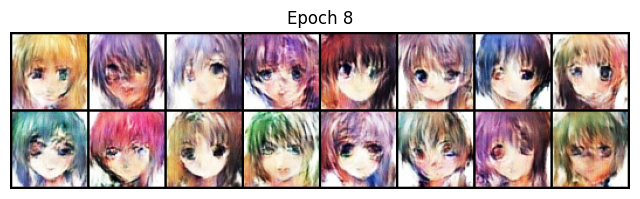

Epoch [9/10], Step [0/497], D Loss: 0.6758, G Loss: 2.2882
Epoch [9/10], Step [50/497], D Loss: 0.7281, G Loss: 1.6978
Epoch [9/10], Step [100/497], D Loss: 0.6762, G Loss: 2.5411
Epoch [9/10], Step [150/497], D Loss: 0.6711, G Loss: 2.2744
Epoch [9/10], Step [200/497], D Loss: 0.6761, G Loss: 2.5523
Epoch [9/10], Step [250/497], D Loss: 1.3737, G Loss: 6.1464
Epoch [9/10], Step [300/497], D Loss: 0.7054, G Loss: 2.4951
Epoch [9/10], Step [350/497], D Loss: 0.6753, G Loss: 2.4408
Epoch [9/10], Step [400/497], D Loss: 0.6755, G Loss: 2.0321
Epoch [9/10], Step [450/497], D Loss: 0.7158, G Loss: 2.4784


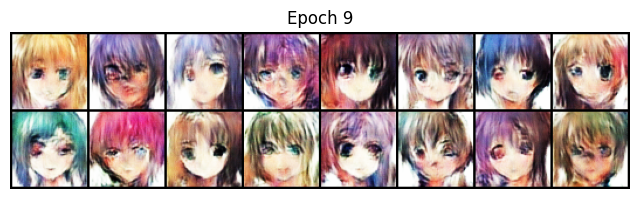

Epoch [10/10], Step [0/497], D Loss: 0.6888, G Loss: 2.8877
Epoch [10/10], Step [50/497], D Loss: 0.7016, G Loss: 2.0147
Epoch [10/10], Step [100/497], D Loss: 0.6732, G Loss: 2.1868
Epoch [10/10], Step [150/497], D Loss: 0.6751, G Loss: 2.1164
Epoch [10/10], Step [200/497], D Loss: 0.7042, G Loss: 1.9290
Epoch [10/10], Step [250/497], D Loss: 0.9517, G Loss: 4.4193
Epoch [10/10], Step [300/497], D Loss: 0.7197, G Loss: 1.9114
Epoch [10/10], Step [350/497], D Loss: 0.6808, G Loss: 2.1685
Epoch [10/10], Step [400/497], D Loss: 0.6763, G Loss: 2.4633
Epoch [10/10], Step [450/497], D Loss: 0.7273, G Loss: 1.8405


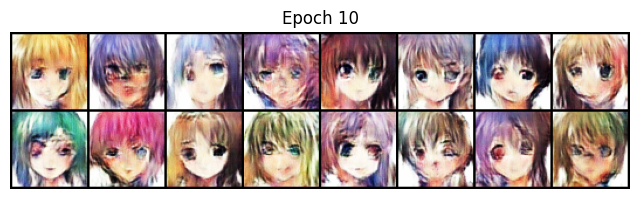

In [33]:
# 🏋️ Training Loop
for epoch in range(epochs):
    for i, (real_imgs, _) in enumerate(train_loader):
        batch_size = real_imgs.size(0)
        real_imgs = real_imgs.to(device)

        # 🌟 Label Smoothing
        real_labels = torch.full((batch_size, 1), 0.9, device=device)
        fake_labels = torch.full((batch_size, 1), 0.1, device=device)

        # 🎭 Train Discriminator
        z = torch.randn(batch_size, 100, device=device)
        fake_imgs = G(z).detach()

        real_preds = D(real_imgs)
        fake_preds = D(fake_imgs)

        d_loss_real = criterion(real_preds, real_labels)
        d_loss_fake = criterion(fake_preds, fake_labels)
        d_loss = d_loss_real + d_loss_fake

        d_optimizer.zero_grad()
        d_loss.backward()
        d_optimizer.step()

        # 🎭 Train Generator
        z = torch.randn(batch_size, 100, device=device)
        fake_imgs = G(z)
        fake_preds = D(fake_imgs)

        g_loss = criterion(fake_preds, torch.ones_like(fake_preds, device=device))

        g_optimizer.zero_grad()
        g_loss.backward()
        g_optimizer.step()

        # Store Losses
        d_losses.append(d_loss.item())
        g_losses.append(g_loss.item())

        if i % 50 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Step [{i}/{len(train_loader)}], D Loss: {d_loss.item():.4f}, G Loss: {g_loss.item():.4f}")

    # Save Sample Images
    with torch.no_grad():
        fake_samples = G(fixed_noise).cpu()
        grid = torchvision.utils.make_grid(fake_samples, normalize=True)
        plt.figure(figsize=(8, 8))
        plt.imshow(grid.permute(1, 2, 0))
        plt.title(f"Epoch {epoch+1}")
        plt.axis("off")
        plt.show()

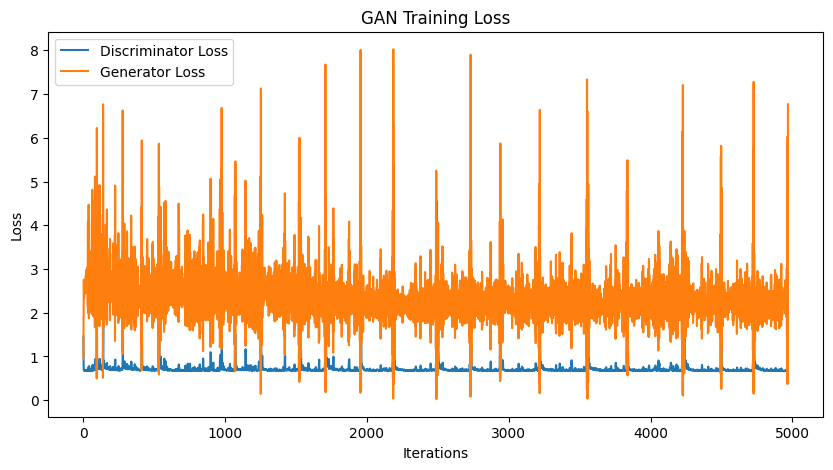

In [34]:
# 📊 Plot Loss Graphs
plt.figure(figsize=(10, 5))
plt.plot(d_losses, label="Discriminator Loss")
plt.plot(g_losses, label="Generator Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.title("GAN Training Loss")
plt.show()

In [35]:
import matplotlib.pyplot as plt
import numpy as np

In [36]:
# Function to generate and display images
def generate_and_display_images(num_images=5):
    G.eval()  # Set generator to evaluation mode

    # Generate random noise as input
    z = torch.randn(num_images, 100).to(device)

    # Generate images
    with torch.no_grad():
        generated_images = G(z).cpu()

    # Convert images from [-1,1] to [0,1] for display
    generated_images = (generated_images + 1) / 2

    # Display images
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i in range(num_images):
        img = np.transpose(generated_images[i].numpy(), (1, 2, 0))  # Change shape to HWC
        axes[i].imshow(img)
        axes[i].axis("off")

    plt.show()

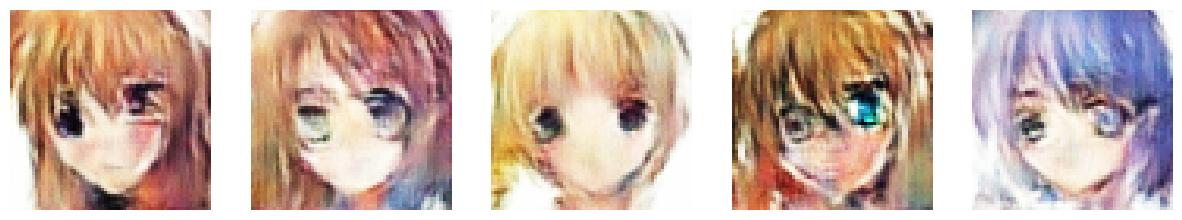

In [37]:
# Generate and visualize images
generate_and_display_images(num_images=5)

In [38]:
# Save the trained models
torch.save(G.state_dict(), "generator.pth")
torch.save(D.state_dict(), "discriminator.pth")
print("Models saved successfully!")

Models saved successfully!


In [39]:
from google.colab import files

# Download the trained models
files.download("generator.pth")
files.download("discriminator.pth")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>